In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
childcare = pd.read_csv("childcare_costs.csv")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [5]:
counties = pd.read_csv("counties.csv")
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [6]:
counties['county_name'] = counties['county_name'].str.lower()
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,autauga county,Alabama,AL
1,1003,baldwin county,Alabama,AL
2,1005,barbour county,Alabama,AL
3,1007,bibb county,Alabama,AL
4,1009,blount county,Alabama,AL


In [23]:
# Join counties and childcare information
childcare_counties = childcare.merge(counties, how="inner", on="county_fips_code")
nc_counties = childcare_counties[childcare_counties['state_abbreviation']=='NC']
nc_counties.head(10)

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
20789,37001,2008,5.71,5.32,6.07,5.2,4.9,5.5,77.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20790,37001,2009,6.60,6.12,7.05,6.1,5.7,6.5,75.8,74.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20791,37001,2010,8.35,7.42,9.24,7.9,6.9,8.9,75.7,76.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20792,37001,2011,8.64,7.55,9.68,8.1,6.9,9.2,75.1,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20793,37001,2012,9.38,8.41,10.33,8.7,7.7,9.6,74.5,76.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20794,37001,2013,9.98,8.73,11.20,9.4,8.1,10.5,73.5,75.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20795,37001,2014,9.50,8.35,10.58,8.9,7.8,9.9,73.6,73.3,...,80.55,159.43,144.97,145.85,112.64,104.69,96.80,alamance county,North Carolina,NC
20796,37001,2015,7.87,7.12,8.61,7.2,6.6,7.7,73.6,76.5,...,94.16,160.65,148.71,140.63,121.98,113.51,108.85,alamance county,North Carolina,NC
20797,37001,2016,6.92,6.65,7.20,6.3,6.0,6.6,73.3,75.0,...,107.77,162.10,152.45,135.42,131.32,122.34,120.90,alamance county,North Carolina,NC
20798,37001,2017,5.98,5.83,6.13,5.4,5.3,5.5,73.6,72.8,...,121.38,163.54,156.19,130.21,140.65,131.16,132.94,alamance county,North Carolina,NC


<Axes: xlabel='mhi_2018', ylabel='Mean of Median Price Charge for Family Childcare'>

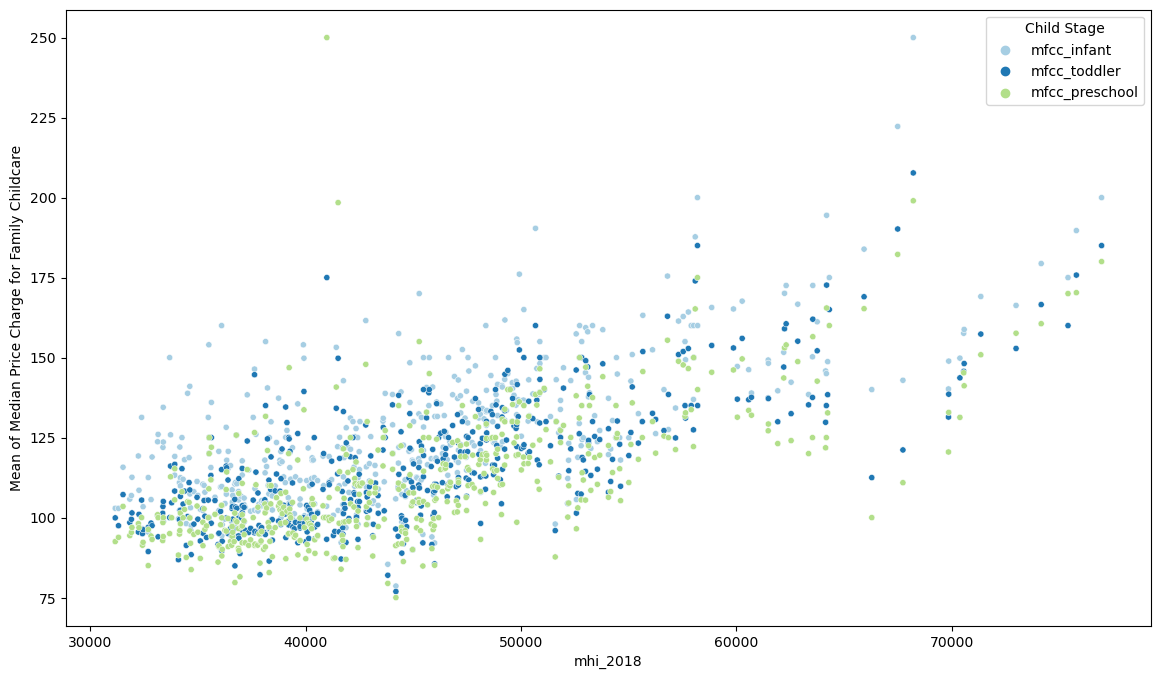

In [40]:
# Scatterplot between childcare costs and average income
import seaborn as sns

nc_year_grouped = nc_counties.groupby('mhi_2018')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']].mean()
nc_year_grouped = nc_year_grouped.reset_index()
melted_data = pd.melt(nc_year_grouped, id_vars=['mhi_2018'], value_vars=['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'], var_name='Child Stage', value_name='Mean of Median Price Charge for Family Childcare')
plt.figure(figsize=(14, 8))
sns.scatterplot(x='mhi_2018', y="Mean of Median Price Charge for Family Childcare", hue="Child Stage",palette='Paired',data=melted_data,s=20)